In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Erdos Fall 2022/grammar_train_comb.csv', index_col=0)
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Erdos Fall 2022/grammar_test.csv', index_col=0)

In [4]:
train

,cleaned_full_text,grammar_score,ratio_grammar_correct_sentences,sentence_number
0,I think that students would benefit from learn...,4.0,0.666667,18
1,When a problem is a change you have to let it ...,2.0,0.357143,14
2,"Dear, Principal If u change the school policy ...",3.0,0.631579,19
3,The best time in life is when you become yours...,4.0,0.916667,36
4,Small act of kindness can impact in other peop...,2.5,0.000000,3
...,...,...,...,...
3906,I believe using cellphones in class for educat...,2.5,0.500000,6
3907,"Working alone, students do not have to argue w...",3.5,0.437500,16
3908,"""A problem is a chance for you to do your best...",3.5,0.375000,8
3909,Many people disagree with Albert Schweitzer's ...,4.5,1.000000,21


In [5]:
test

,cleaned_full_text,sentence_number,ratio_grammar_correct_sentences
0,when a person has no experience on a job their...,26,0.076923
1,Do you think students would benefit from being...,17,0.294118
2,"Thomas Jefferson once states that ""it is wonde...",17,0.647059


# EDA

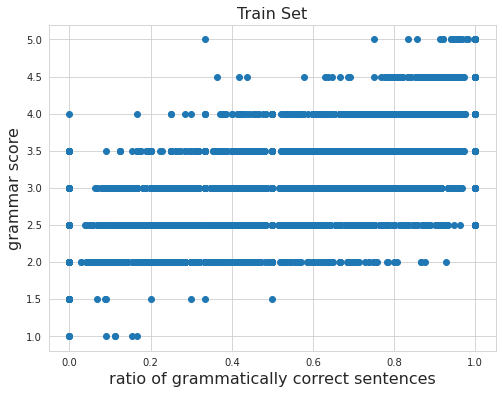

In [6]:
# Score over correct_ratio on train set
plt.figure(figsize=(8,6))

plt.scatter(train.ratio_grammar_correct_sentences, 
            train.grammar_score)

plt.xlabel("ratio of grammatically correct sentences", fontsize=16)
plt.ylabel("grammar score", fontsize=16)
plt.title("Train Set", fontsize=16)

plt.show()

## Bubble Plots

In [7]:
import plotly.express as px

In [8]:
sz = train.groupby(['ratio_grammar_correct_sentences', 'grammar_score']).size()

In [9]:
sz

ratio_grammar_correct_sentences  grammar_score
0.0                              1.0                3
                                 1.5               13
                                 2.0              106
                                 2.5               75
                                 3.0               32
                                                 ... 
1.0                              3.0               20
                                 3.5               39
                                 4.0               33
                                 4.5               18
                                 5.0                9
Length: 1114, dtype: int64

In [11]:
# Array for bubble size
ratio, score = zip(*sz.index)

fig = px.scatter(x=ratio, y=score, title = 'Ratio of Grammatically Correct Sentences vs Grammar Score for Training Data', size = sz,
                 labels = {'x': 'Ratio of Grammatically Correct Sentences', 'y': 'Grammar Score', 'size': 'Count'},
                 log_x=False, log_y = False, size_max=50)

fig.show()

# Try Models

In [37]:
from sklearn.metrics import mean_squared_error as MSE

### Prepare data

In [59]:
data_arr = np.asarray(train[['ratio_grammar_correct_sentences','sentence_number']])

In [60]:
data_arr.shape

(3911, 2)

In [61]:
target_arr = np.asarray(train['grammar_score'])

In [62]:
target_arr.shape

(3911,)

In [63]:
target_arr = np.reshape(target_arr, (target_arr.shape[0], 1))

In [64]:
target_arr.shape

(3911, 1)

In [86]:
data_ratio = np.asarray(train['ratio_grammar_correct_sentences'])

In [89]:
data_ratio.shape

(3911,)

In [90]:
data_ratio = np.reshape(data_ratio, (data_ratio.shape[0], 1))

In [91]:
data_ratio.shape

(3911, 1)

## Linear Model 1

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model_linear1 = LinearRegression(copy_X = True, fit_intercept = True)

In [79]:
model_linear1.fit(data_arr[:3200],target_arr[:3200])

LinearRegression()

In [80]:
target_true = target_arr[3200:]
target_predict = model_linear1.predict(data_arr[3200:])
MSE(target_true,target_predict)

0.3184300147818662

## Linear Model 2

What if we only feed in the ratio without giving the number of sentences?

In [92]:
model_linear2 = LinearRegression(copy_X = True, fit_intercept = True)

In [93]:
model_linear2.fit(data_ratio[:3200],target_arr[:3200])

LinearRegression()

In [94]:
target_true = target_arr[3200:]
target_predict = model_linear2.predict(data_ratio[3200:])
MSE(target_true,target_predict)

0.3183927316119916

It seems that the number of sentences doesn't really help with the prediction, we can probably just feed in the ratio.

## XGBoost

In [38]:
import xgboost as xgb

n_estimators=500

In [206]:
model_xgb1 = xgb.XGBRegressor(n_estimators=500,
                              max_depth = 2,
                              objective='reg:squarederror')

In [207]:
model_xgb1.fit(data_arr[:3200],target_arr[:3200])

XGBRegressor(max_depth=2, n_estimators=500, objective='reg:squarederror')

In [208]:
target_true = target_arr[3200:]
target_predict = model_xgb1.predict(data_arr[3200:])
MSE(target_true,target_predict)

0.3204369009007939

n_estimators=100

In [203]:
model_xgb2 = xgb.XGBRegressor(n_estimators=100,
                              max_depth = 2,
                              objective='reg:squarederror')

In [204]:
model_xgb2.fit(data_arr[:3200],target_arr[:3200])

XGBRegressor(max_depth=2, objective='reg:squarederror')

In [205]:
target_true = target_arr[3200:]
target_predict = model_xgb2.predict(data_arr[3200:])
MSE(target_true,target_predict)

0.31042525350537004

n_estimators=200

In [209]:
model_xgb3 = xgb.XGBRegressor(n_estimators=200, 
                              max_depth = 2,
                              objective='reg:squarederror')

In [210]:
model_xgb3.fit(data_arr[:3200],target_arr[:3200])

XGBRegressor(max_depth=2, n_estimators=200, objective='reg:squarederror')

In [211]:
target_true = target_arr[3200:]
target_predict = model_xgb3.predict(data_arr[3200:])
MSE(target_true,target_predict)

0.3129511128797022

n_estimators=1000

In [212]:
model_xgb4 = xgb.XGBRegressor(n_estimators=1000,
                              max_depth = 2,
                              objective='reg:squarederror')

In [213]:
model_xgb4.fit(data_arr[:3200],target_arr[:3200])

XGBRegressor(max_depth=2, n_estimators=1000, objective='reg:squarederror')

In [214]:
target_true = target_arr[3200:]
target_predict = model_xgb4.predict(data_arr[3200:])
MSE(target_true,target_predict)

0.3284219053521019

Let's use n_estimators=100 for XGB. Also, by trials, max_depth = 2 works better.

Again, what if we only feed in the ratio?

In [188]:
model_xgb5 = xgb.XGBRegressor(n_estimators=100,
                              max_depth = 1,
                              objective='reg:squarederror')

In [189]:
model_xgb5.fit(data_ratio[:3200],target_arr[:3200])

XGBRegressor(max_depth=1, objective='reg:squarederror')

In [190]:
target_true = target_arr[3200:]
target_predict = model_xgb5.predict(data_ratio[3200:])
MSE(target_true,target_predict)

0.3160454629354808

Observed that with n_estimators=100 and only feeding in the ratio, setting max_depth = 1 gives the lowest loss, but this is still higher than the one gotten when feeding in both the ratio and the number of sentences. So let's feed in both the ratio and the sentence number for XGB.

## Dense Layer

## 1 layer

In [215]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [261]:
model_dense1 = Sequential()
model_dense1.add(Dense(1, input_shape=(2,), activation='softmax'))

In [262]:
model_dense1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [263]:
model_dense1.fit(data_arr, target_arr, epochs=5, batch_size=1)

Epoch 1/5
3911/3911 [==============================] - 8s 2ms/step - loss: 4.6222 - accuracy: 0.0020
Epoch 2/5
3911/3911 [==============================] - 7s 2ms/step - loss: 4.6222 - accuracy: 0.0020
Epoch 3/5
3911/3911 [==============================] - 7s 2ms/step - loss: 4.6222 - accuracy: 0.0020
Epoch 4/5
3911/3911 [==============================] - 7s 2ms/step - loss: 4.6222 - accuracy: 0.0020
Epoch 5/5
3911/3911 [==============================] - 7s 2ms/step - loss: 4.6222 - accuracy: 0.0020


In [264]:
re = model_dense1.evaluate(data_arr, target_arr)

123/123 [==============================] - 0s 2ms/step - loss: 4.6222 - accuracy: 0.0020


In [265]:
print('loss: ', re[0])
print('accuracy: ', re[1])

loss:  4.622155666351318
accuracy:  0.0020455126650631428


## 2+ layers with various layer sizes

2 layers

In [251]:
model_dense2 = Sequential()
model_dense2.add(Dense(24, input_shape=(2,), activation='tanh'))
model_dense2.add(Dense(1, activation='sigmoid'))

In [252]:
model_dense2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [253]:
model_dense2.fit(data_arr, target_arr, epochs=3, batch_size=10)

Epoch 1/3
392/392 [==============================] - 2s 3ms/step - loss: 4.7331 - accuracy: 0.0020
Epoch 2/3
392/392 [==============================] - 1s 2ms/step - loss: 4.6285 - accuracy: 0.0020
Epoch 3/3
392/392 [==============================] - 1s 2ms/step - loss: 4.6252 - accuracy: 0.0020


In [254]:
re = model_dense2.evaluate(data_arr, target_arr)

123/123 [==============================] - 0s 2ms/step - loss: 4.6246 - accuracy: 0.0020


In [255]:
print('loss: ', re[0])
print('accuracy: ', re[1])

loss:  4.624608993530273
accuracy:  0.0020455126650631428


After trying different numbers of layers and different activation function (ReLU, tanh, sigmoid, softmax), there's no significant change in the loss or accuracy. So a single layer will be enough.

# Use kfold validation

In [267]:
from sklearn.model_selection import KFold
# from sklearn.preprocessing import StandardScaler

kfold = KFold(n_splits = 10,
              shuffle = True,
              random_state = 404)

# Linear Regression

In [268]:
from sklearn.linear_model import LinearRegression

In [269]:
cv_rmses_linear = np.zeros((10,))
cv_rmses_xgb = np.zeros((10,))
cv_rmses_dense = np.zeros((10,))

# Use mean of rating as baseline to compare
cv_rmses_baseline = np.zeros((10,))

i = 0
for train_ind, val_ind in kfold.split(data_arr, target_arr):
    x_t = data_arr[train_ind]
    x_ratio_t = data_ratio[train_ind]
    y_t = target_arr[train_ind]
    
    x_val = data_arr[val_ind]
    x_ratio_val = data_ratio[val_ind]
    y_val = target_arr[val_ind]
    
    # linear model (only feed in ratio)
    model_linear = LinearRegression(copy_X = True, fit_intercept = True)
    model_linear.fit(x_ratio_t, y_t)
    # model_linear.fit(x_t.reshape(-1,1), y_t)
    predicted = model_linear.predict(x_ratio_val)
    cv_rmses_linear[i] = MSE(y_val, predicted, squared=False)

    # xgb model
    model_xgb = xgb.XGBRegressor(n_estimators=100,
                                max_depth = 2,
                                objective='reg:squarederror')
    model_xgb.fit(x_t, y_t)
    predicted = model_xgb.predict(x_val)
    cv_rmses_xgb[i] = MSE(y_val, predicted, squared=False)
    
    # keras dense layer
    model_dense = Sequential()
    model_dense.add(Dense(1, input_shape=(2,), activation='softmax'))
    model_dense.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model_dense.fit(data_arr, target_arr, epochs=5, batch_size=1)
    cv_rmses_dense[i] = np.sqrt(model_dense.evaluate(data_arr, target_arr)[0])
    
    # baseline model
    bsl = y_t.mean()*np.ones(len(y_val))
    cv_rmses_baseline[i] = MSE(y_val, bsl, squared=False)
    
    i += 1
    

Epoch 1/5
3911/3911 [==============================] - 9s 2ms/step - loss: 4.6222 - accuracy: 0.0020
Epoch 2/5
3911/3911 [==============================] - 7s 2ms/step - loss: 4.6222 - accuracy: 0.0020
Epoch 3/5
3911/3911 [==============================] - 7s 2ms/step - loss: 4.6222 - accuracy: 0.0020
Epoch 4/5
3911/3911 [==============================] - 9s 2ms/step - loss: 4.6222 - accuracy: 0.0020
Epoch 5/5
123/123 [==============================] - 0s 2ms/step - loss: 4.6222 - accuracy: 0.0020
Epoch 1/5
3911/3911 [==============================] - 13s 3ms/step - loss: 4.6222 - accuracy: 0.0020
Epoch 2/5
3911/3911 [==============================] - 16s 4ms/step - loss: 4.6222 - accuracy: 0.0020
Epoch 3/5
3911/3911 [==============================] - 13s 3ms/step - loss: 4.6222 - accuracy: 0.0020
Epoch 4/5
3911/3911 [==============================] - 15s 4ms/step - loss: 4.6222 - accuracy: 0.0020
Epoch 5/5
123/123 [==============================] - 0s 2ms/step - loss: 4.6222 - accurac

In [270]:
print('Cross Validation kfold = 10')
print()
print('Linear Model RMSEs are ', cv_rmses_linear)

Cross Validation kfold = 10

Linear Model RMSEs are  [0.55010557 0.52581692 0.60053674 0.53642462 0.51248358 0.55561593
 0.54052365 0.53025311 0.52587489 0.53824659]


In [271]:
print('Linear Model Mean of RMSEs is ', cv_rmses_linear.mean())

Linear Model Mean of RMSEs is  0.5415881605801763


In [272]:
print('XGB Model RMSEs are ', cv_rmses_xgb)

XGB Model RMSEs are  [0.54526016 0.5261216  0.59040968 0.52634636 0.50459152 0.54369482
 0.52989687 0.5280452  0.52876712 0.52922264]


In [273]:
print('XGB Model Mean of RMSEs is ', cv_rmses_xgb.mean())

XGB Model Mean of RMSEs is  0.5352355968701847


In [274]:
print('NN Model RMSEs are ', cv_rmses_dense)

NN Model RMSEs are  [2.14991992 2.14991992 2.14991992 2.14991992 2.14991992 2.14991992
 2.14991992 2.14991992 2.14991992 2.14991992]


In [275]:
print('NN Model Mean of RMSEs is ', cv_rmses_dense.mean())

NN Model Mean of RMSEs is  2.149919920915967


Dense layer doesn't perform well. Don't even need to plot this.

In [276]:
print('Baseline RMSEs are ', cv_rmses_baseline)

Baseline RMSEs are  [0.73035137 0.67561772 0.76458038 0.70343065 0.6707249  0.68126657
 0.71128164 0.69653214 0.67171097 0.68756408]


In [277]:
print('Mean of baseline RMSEs is ', cv_rmses_baseline.mean())

Mean of baseline RMSEs is  0.6993060426668596


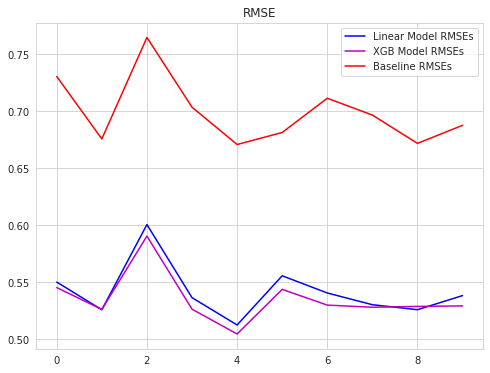

In [281]:
plt.figure(figsize=(8,6))

plt.plot(cv_rmses_linear, 'b-', label="Linear Model RMSEs")
plt.plot(cv_rmses_xgb, 'm-', label="XGB Model RMSEs")
plt.plot(cv_rmses_baseline, 'r-', label="Baseline RMSEs")
plt.legend()
# plt.ylim(.5, .8)
plt.title('RMSE')

plt.show()

The XGBRegressor model is comparatively the best.